In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
loc_x = [0,10,15,45,20,60,60,90,90,54,21,63,16,26,58,33,33,80,100,100,22,33,48,50,90,20,80,30,20,0,100,11,11,11,80,43,76,57,99,99,5]

In [3]:
loc_y = [0,10,30,77,50,50,15,25,79,18,10,91,71,29,39,15,55,90,79,59,80,81,88,77,76,56,60,5,10,30,80,54,90,18,43,81,67,50,21,88,31]

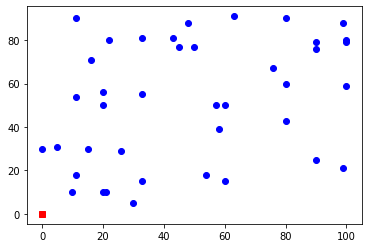

In [4]:
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.scatter(loc_x[1:], loc_y[1:], c='b')

In [5]:
n = 40
N = [i for i in range(1, n+1)]
V = [0] + N 

In [6]:
arcs = [(i, j) for i in V for j in V ]
distance = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in arcs}

In [7]:
customer_list = [1,3,7,9,11,12,13,14,16,17,18,19,21,23,24,26,27,28,29,31,34,36,37,38,39]

In [8]:
must_add_list = [10,20,35]

In [9]:
for i in must_add_list:
    customer_list.append(i)

In [10]:
Solution = [0]

In [11]:
cand_list = []

In [12]:
def get_min_value_index(X):
    M = min(X)
    ind = X.index(M)
    return ind

In [13]:
def cost_for_lcl(A):
    dist = sum(distance[A[j],A[j+1]] for j in range(len(A)-1))
    return dist

In [14]:
must_add_list_v2 = [2,4,6,8,22,32,33]

for i in range(2):
    u = random.randint(0,len(must_add_list_v2))
    customer_list.append(must_add_list_v2[u])
    must_add_list_v2.pop(u)

In [15]:
def combinations(array, tuple_length, prev_array=[]):
    if len(prev_array) == tuple_length:
        return [prev_array]
    combs = []
    for i, val in enumerate(array):
        prev_array_extended = prev_array.copy()
        prev_array_extended.append(val)
        combs += combinations(array[i+1:], tuple_length, prev_array_extended)
    return combs

In [16]:
B = combinations([5,10,15,20,25,30,35,40], 3)

In [17]:
A = combinations([2, 4, 6, 8, 10, 20, 22, 32, 33, 35],5)

In [18]:
clist_pool = []
customer_list = [1,3,7,9,11,12,13,14,16,17,18,19,21,23,24,26,27,28,29,31,34,36,37,38,39]
for i in B:
    for j in A:
        customer_list = customer_list+i
        customer_list = customer_list+j
        clist_pool.append(customer_list)
        customer_list = [1,3,7,9,11,12,13,14,16,17,18,19,21,23,24,26,27,28,29,31,34,36,37,38,39]

In [19]:
for i in range(len(clist_pool)):
    clist_pool[i] = list(set(clist_pool[i]))

In [20]:
Distance_List = []
Solution_List = []
for i in range(len(clist_pool)):
    customer_list = clist_pool[i]
    city_from = 0
    N = customer_list.copy()
    Solution = [0]
    for l in range(len(N)):
        cand_list = []
        for t in customer_list:
            cand_list.append(distance[city_from,t])
        added = get_min_value_index(cand_list)
        Solution.append(customer_list[added])
        city_from = customer_list[added]
        customer_list.pop(added)
    Solution.append(0)
    Solution_List.append(Solution)
    Distance = cost_for_lcl(Solution)
    Distance_List.append(Distance)

        
    print("Iteration", i + 1 )
    print("Greedy Algorithm Best Solution found:", Solution )
    print("distance", Distance)  

Iteration 1
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 555.912821819988
Iteration 2
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 558.0517537402512
Iteration 3
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 563.2852470737225
Iteration 4
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 579.60635024907
Iteration 5
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]

distance 629.582149084442
Iteration 231
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 590.6398581327094
Iteration 232
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 640.6850019745721
Iteration 233
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 582.9195415873771
Iteration 234
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 574.6387145746123
Iteration 235
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 2

Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 536.3764703007539
Iteration 398
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 29, 0]
distance 602.8654403683822
Iteration 399
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 552.0297225672531
Iteration 400
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 543.7488955544884
Iteration 401
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 29, 0]
distance 6

Iteration 564
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 562.7356451055807
Iteration 565
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 554.4548180928159
Iteration 566
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 562.1431499524875
Iteration 567
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 32, 0]
distance 638.1029752608392
Iteration 568
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6,

Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 587.5646432810836
Iteration 731
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 32, 0]
distance 654.8916972737594
Iteration 732
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 32, 0]
distance 646.6108702609947
Iteration 733
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 573.3824720259993
Iteration 734
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 

Iteration 897
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 545.0096815309759
Iteration 898
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 541.9327428503235
Iteration 899
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 29, 0]
distance 595.4998877248089
Iteration 900
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 31, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 544.6641699236798
Iteration 901
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 

distance 572.4285090290481
Iteration 1064
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 588.7496122043956
Iteration 1065
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 550.5348073807543
Iteration 1066
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 555.7683007142256
Iteration 1067
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 572.089403889573
Iteration 1068
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 

Iteration 1246
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 604.5354311803057
Iteration 1247
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 594.4315788532149
Iteration 1248
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 580.8419027512239
Iteration 1249
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 597.1630059265713
Iteration 1250
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 1

distance 585.3657248787227
Iteration 1397
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 571.7760487767317
Iteration 1398
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 563.4952217639669
Iteration 1399
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 588.0971519520791
Iteration 1400
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 579.8163249393143
Iteration 1401
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 11, 17, 8, 

Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 660.0303262441552
Iteration 1564
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 568.8414576723051
Iteration 1565
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 675.6835785106545
Iteration 1566
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 667.4027514978897
Iteration 1567
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 

Iteration 1730
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 567.2622363095646
Iteration 1731
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 558.9814092967998
Iteration 1732
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 627.7591237701159
Iteration 1733
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 619.4782967573511
Iteration 1734
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 

distance 549.6044170856205
Iteration 1897
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 29, 0]
distance 603.1715619601059
Iteration 1898
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 552.3358441589769
Iteration 1899
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 544.0550171462121
Iteration 1900
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 25, 31, 12, 32, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 571.1590135944392
Iteration 1901
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 21, 3, 23, 22, 11, 17, 8, 24, 18, 

Iteration 2063
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 665.5865987937248
Iteration 2064
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 574.3977302218747
Iteration 2065
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 566.1169032091099
Iteration 2066
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 668.3180258670811
Iteration 2067
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36,

Iteration 2245
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 568.9768439805638
Iteration 2246
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 629.4737314411151
Iteration 2247
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 590.5314404893825
Iteration 2248
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 640.6918745847332
Iteration 2249
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26

Iteration 2442
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 561.0526428090291
Iteration 2443
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 624.7236400106053
Iteration 2444
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 614.6197876835145
Iteration 2445
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 563.7840698823854
Iteration 2446
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 3

Iteration 2639
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 595.7069253595834
Iteration 2640
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 582.1172492575923
Iteration 2641
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 598.4383524329397
Iteration 2642
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 650.1871783243272
Iteration 2643
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36

distance 562.4618500239828
Iteration 2813
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 669.3039708623322
Iteration 2814
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 578.1151022904821
Iteration 2815
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 569.8342752777173
Iteration 2816
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 672.0353979356886
Iteration 2817
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 

Iteration 3010
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 673.1531205812055
Iteration 3011
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 664.8722935684408
Iteration 3012
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 573.6834249965906
Iteration 3013
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 667.603720641797
Iteration 3014
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36,

Iteration 3197
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 567.5786102017388
Iteration 3198
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 559.297783188974
Iteration 3199
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 621.1457550762242
Iteration 3200
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 612.8649280634594
Iteration 3201
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38,

Iteration 3369
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 633.4000071596193
Iteration 3370
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 575.6345467724244
Iteration 3371
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 565.5306944453336
Iteration 3372
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 640.7724324133538
Iteration 3373
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 3

Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 667.3597343746505
Iteration 3563
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 659.0789073618857
Iteration 3564
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 567.8900387900356
Iteration 3565
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 562.7894584426081
Iteration 3566
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 

Iteration 3749
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 617.8913834879413
Iteration 3750
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 560.1259231007464
Iteration 3751
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 633.5446357544406
Iteration 3752
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 0]
distance 625.2638087416758
Iteration 3753
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37

Iteration 3912
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 547.8495574655655
Iteration 3913
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 32, 29, 0]
distance 601.4167023400508
Iteration 3914
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 550.5809845389217
Iteration 3915
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 29, 0]
distance 542.300157526157
Iteration 3916
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 32, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9

Iteration 4068
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 570.9728983905557
Iteration 4069
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 569.8342752777173
Iteration 4070
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 663.7545709229238
Iteration 4071
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 572.5657023510737
Iteration 4072
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 3

Iteration 4248
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 588.1107712408287
Iteration 4249
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 32, 0]
distance 646.6108702609947
Iteration 4250
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 573.3824720259993
Iteration 4251
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 563.2786196989085
Iteration 4252
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37,

Iteration 4435
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 570.9359172795869
Iteration 4436
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 32, 0]
distance 651.7373571207658
Iteration 4437
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 578.5089588857704
Iteration 4438
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 0]
distance 570.2281318730056
Iteration 4439
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5,

Iteration 4593
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 550.5416799909154
Iteration 4594
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 555.7751733243867
Iteration 4595
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 572.0962764997341
Iteration 4596
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 6, 7, 38, 34, 16, 0]
distance 558.506600397743
Iteration 4597
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9

Iteration 4727
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 583.0376788114038
Iteration 4728
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 629.6797874310515
Iteration 4729
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 29, 0]
distance 619.5759351039607
Iteration 4730
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 29, 0]
distance 568.7402173028316
Iteration 4731
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 

Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 570.9199555236796
Iteration 4887
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 595.5218857117919
Iteration 4888
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 587.2410586990271
Iteration 4889
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 573.651382597036
Iteration 4890
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7

Iteration 5132
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 573.0520148337818
Iteration 5133
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 32, 0]
distance 633.5489022943331
Iteration 5134
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 575.7834419071381
Iteration 5135
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 16, 0]
distance 565.6795895800473
Iteration 5136
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 5, 

distance 675.8935532008987
Iteration 5233
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 665.7897008738079
Iteration 5234
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 574.6008323019578
Iteration 5235
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 32, 0]
distance 668.5211279471642
Iteration 5236
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 5, 37, 14, 9, 34, 7, 38, 0]
distance 596.1554288107766
Iteration 5237
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39,

Iteration 5395
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 553.8588628209639
Iteration 5396
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 545.578035808199
Iteration 5397
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 629.1453795029829
Iteration 5398
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 620.8645524902181
Iteration 5399
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 1

Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 560.4407769028961
Iteration 5562
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 552.1599498901313
Iteration 5563
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 32, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 576.7618800782436
Iteration 5564
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 568.4810530654788
Iteration 5565
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38,

Iteration 5734
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 591.6689486052134
Iteration 5735
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 607.9900517805607
Iteration 5736
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 652.9244253393704
Iteration 5737
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 644.6435983266056
Iteration 5738
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36

distance 543.4459764980969
Iteration 5895
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 568.0479066862092
Iteration 5896
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 559.7670796734444
Iteration 5897
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.1774035714533
Iteration 5898
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 626.4208250397876
Iteration 5899
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 

Iteration 6075
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 540.061393043716
Iteration 6076
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 650.3006837382759
Iteration 6077
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 542.7928201170723
Iteration 6078
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 532.6889677899815
Iteration 6079
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 3

distance 600.5493562649409
Iteration 6228
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 586.9596801629498
Iteration 6229
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 31, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 603.2807833382973
Iteration 6230
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 639.2729116711087
Iteration 6231
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 588.4371938699798
Iteration 6232
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 1

Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.635332701943
Iteration 6395
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 538.3545056891782
Iteration 6396
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 32, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 565.4585021374054
Iteration 6397
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 551.8688260354143
Iteration 6398
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0

Iteration 6561
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 619.1482716199564
Iteration 6562
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 553.4455513392087
Iteration 6563
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 545.1647243264439
Iteration 6564
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 550.7141242658523
Iteration 6565
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14

Iteration 6730
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 651.8241113223874
Iteration 6731
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 643.5432843096225
Iteration 6732
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 592.7075665084936
Iteration 6733
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 646.2747113829789
Iteration 6734
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7,

Iteration 6896
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 542.0001508738179
Iteration 6897
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 617.286667555837
Iteration 6898
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 544.7315779471742
Iteration 6899
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 536.4507509344095
Iteration 6900
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]

Iteration 7039
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 627.3643825282559
Iteration 7040
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 619.0835555154911
Iteration 7041
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.5284659068284
Iteration 7042
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 634.7368077819905
Iteration 7043
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16,

Iteration 7144
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 0]
distance 608.5708038123812
Iteration 7145
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 0]
distance 598.4669514852903
Iteration 7146
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 540.7014910980954
Iteration 7147
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 0]
distance 601.1983785586466
Iteration 7148
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 

distance 538.7813257045678
Iteration 7311
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 546.1537509583023
Iteration 7312
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 614.5878983124064
Iteration 7313
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 548.8851780316587
Iteration 7314
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 540.6043510188939
Iteration 7315
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 

Iteration 7477
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 656.968460126959
Iteration 7478
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 648.6876331141942
Iteration 7479
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 541.1797694929907
Iteration 7480
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 654.2370330536027
Iteration 7481
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 3

Iteration 7662
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 652.5759272463473
Iteration 7663
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 545.0680636251437
Iteration 7664
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 536.7872366123789
Iteration 7665
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 655.3073543197037
Iteration 7666
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19,

Iteration 7844
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 551.6352678758243
Iteration 7845
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 541.5314155487334
Iteration 7846
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 567.9563710511717
Iteration 7847
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 557.8525187240808
Iteration 7848
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 

Iteration 8009
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 546.2824469719609
Iteration 8010
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 614.716594326065
Iteration 8011
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 549.0138740453172
Iteration 8012
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 538.9100217182264
Iteration 8013
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9

Iteration 8181
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 538.9992679970545
Iteration 8182
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 32, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 566.1032644452818
Iteration 8183
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 557.822437432517
Iteration 8184
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 544.2327613305258
Iteration 8185
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34,

Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 537.6451152104278
Iteration 8366
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 657.9882582320786
Iteration 8367
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 647.8844059049877
Iteration 8368
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 540.3765422837841
Iteration 8369
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14,

Iteration 8550
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.797038833472
Iteration 8551
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 629.1874078425819
Iteration 8552
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 619.0835555154911
Iteration 8553
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.5284659068284
Iteration 8554
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 

distance 577.1574406625608
Iteration 8727
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 568.8766136497959
Iteration 8728
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 555.2869375478049
Iteration 8729
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 571.6080407231523
Iteration 8730
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 536.6321897154694
Iteration 8731
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 

Iteration 8909
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 552.3011304145369
Iteration 8910
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 538.7114543125458
Iteration 8911
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 555.0325574878933
Iteration 8912
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.9651987126965
Iteration 8913
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 

Iteration 9091
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 630.8985659237753
Iteration 9092
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 622.6177389110105
Iteration 9093
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 556.9150186302628
Iteration 9094
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 536.2366291311522
Iteration 9095
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 

Iteration 9263
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 647.3750253999619
Iteration 9264
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 652.8091350858822
Iteration 9265
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 644.5283080731174
Iteration 9266
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 593.6925902719885
Iteration 9267
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38,

Iteration 9434
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 555.573470491963
Iteration 9435
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 630.8599871739821
Iteration 9436
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 625.7594068265544
Iteration 9437
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 553.2043172178917
Iteration 9438
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 3

Iteration 9601
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 542.7928201170723
Iteration 9602
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 532.6889677899815
Iteration 9603
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 539.946102790228
Iteration 9604
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 650.1853934847879
Iteration 9605
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38

distance 625.6767744029922
Iteration 9848
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 617.3959473902274
Iteration 9849
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 551.6932271094797
Iteration 9850
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 531.0148376103691
Iteration 9851
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 538.3872628641036
Iteration 9852
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 

Iteration 9976
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 549.0768767610323
Iteration 9977
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 625.7918511279012
Iteration 9978
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 617.5110241151364
Iteration 9979
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 551.8083038343887
Iteration 9980
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36

distance 546.138873599196
Iteration 10143
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 614.5730209533001
Iteration 10144
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 548.8703006725524
Iteration 10145
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 540.5894736597876
Iteration 10146
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 25, 16, 12, 32, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 567.6934701080147
Iteration 10147
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 29, 31, 25, 16, 12, 21, 3, 23, 22, 11,

Iteration 10309
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 557.3781956727078
Iteration 10310
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 625.8123430268118
Iteration 10311
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 578.9327921815266
Iteration 10312
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 654.3115221218916
Iteration 10313
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 1

Iteration 10481
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 29, 0]
distance 548.5191623721254
Iteration 10482
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 4, 25, 31, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 29, 0]
distance 538.4153100450345
Iteration 10483
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 4, 25, 31, 12, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 29, 0]
distance 524.8256339430435
Iteration 10484
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 29, 0]
distance 585.0574186646821
Iteration 10485
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 3

Iteration 10665
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 2, 40, 29, 31, 25, 16, 12, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 548.1502886314225
Iteration 10666
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 621.4260505183538
Iteration 10667
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 555.7233302376061
Iteration 10668
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 547.4425032248413
Iteration 10669
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 39, 1

Iteration 10836
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 665.6296376472325
Iteration 10837
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 2, 29, 31, 4, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 540.0851288042944
Iteration 10838
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 542.1087704710696
Iteration 10839
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 547.342263804541
Iteration 10840
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 

Iteration 11031
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 29, 9, 0]
distance 641.8959211011381
Iteration 11032
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 4, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 29, 9, 0]
distance 609.8833727354715
Iteration 11033
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 533.0015244699432
Iteration 11034
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 0]
distance 593.4984119304945
Iteration 11035
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26,

Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 555.7717724234402
Iteration 11226
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 547.4909454106754
Iteration 11227
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 572.0928755987876
Iteration 11228
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 563.8120485860228
Iteration 11229
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7,

Iteration 11392
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 542.1650067850647
Iteration 11393
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 571.092028547618
Iteration 11394
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 560.9881762205271
Iteration 11395
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 547.398500118536
Iteration 11396
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 2, 40, 29, 31, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 

Iteration 11571
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 15, 13, 40, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 0]
distance 564.0512111897767
Iteration 11572
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 628.385659350087
Iteration 11573
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 555.8305697414244
Iteration 11574
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 15, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 545.7267174143335
Iteration 11575
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 15, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26

Iteration 11745
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 29, 0]
distance 530.643815929172
Iteration 11746
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 29, 0]
distance 522.3629889164073
Iteration 11747
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 25, 31, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 29, 0]
distance 584.2109608036574
Iteration 11748
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 16, 32, 29, 0]
distance 575.9301337908927
Iteration 11749
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 4, 25, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 

Iteration 11934
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 555.6357281870023
Iteration 11935
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 32, 0]
distance 624.0698755411064
Iteration 11936
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 536.7803640022178
Iteration 11937
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 647.0196546967777
Iteration 11938
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34

Iteration 12127
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 659.4926429841905
Iteration 12128
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 551.984779362987
Iteration 12129
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 543.7039523502222
Iteration 12130
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 662.2240700575469
Iteration 12131
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 

distance 653.3969015564578
Iteration 12283
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 545.8890379352542
Iteration 12284
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 669.0501538229571
Iteration 12285
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 660.7693268101923
Iteration 12286
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 553.2614631889887
Iteration 12287
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 3

Iteration 12446
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.823176188144
Iteration 12447
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 629.2135451972538
Iteration 12448
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 619.109692870163
Iteration 12449
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.5546032615002
Iteration 12450
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 3

Iteration 12638
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 646.2102757253753
Iteration 12639
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 538.7024121041717
Iteration 12640
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 530.4215850914069
Iteration 12641
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 653.5827009791097
Iteration 12642
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26

distance 538.3399247763074
Iteration 12775
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 656.8600424836321
Iteration 12776
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 648.5792154708673
Iteration 12777
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 541.0713518496638
Iteration 12778
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 664.2324677373666
Iteration 12779
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8,

Iteration 12963
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 629.2402774683184
Iteration 12964
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 625.9627224352167
Iteration 12965
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 553.4076328265542
Iteration 12966
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.3037804994632
Iteration 12967
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38,

Iteration 13141
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 543.0158018659246
Iteration 13142
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 653.2550925604845
Iteration 13143
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 545.747228939281
Iteration 13144
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 535.6433766121901
Iteration 13145
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39,

Iteration 13304
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 538.9168943283876
Iteration 13305
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 567.8439160909408
Iteration 13306
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 554.2542399889496
Iteration 13307
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 29, 31, 25, 16, 12, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 544.1503876618589
Iteration 13308
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 2

Iteration 13455
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 32, 21, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 559.3991300149416
Iteration 13456
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 551.1183030021768
Iteration 13457
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 25, 16, 12, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 537.5286269001857
Iteration 13458
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 652.609532127573
Iteration 13459
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 2, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 8, 24, 18, 30,

Iteration 13602
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 25, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 568.479076800935
Iteration 13603
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 16, 12, 20, 21, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 662.1670429663394
Iteration 13604
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 32, 0]
distance 653.8862159535746
Iteration 13605
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 546.378352332371
Iteration 13606
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 25, 16, 12, 20, 21, 35, 3, 23, 11, 17, 24, 18,

Iteration 13767
Greedy Algorithm Best Solution found: [0, 1, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 574.1251374416435
Iteration 13768
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 21, 35, 3, 23, 22, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 560.5354613396524
Iteration 13769
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 27, 13, 40, 29, 31, 25, 4, 16, 12, 32, 21, 35, 3, 23, 11, 17, 24, 18, 39, 19, 26, 36, 34, 7, 38, 6, 9, 14, 37, 0]
distance 576.8565645149998
Iteration 13770
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 39, 19, 26, 36, 34, 7, 38, 14, 37, 9, 0]
distance 543.8190290751311
Iteration 13771
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 25, 4, 16, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 39, 19, 26, 36

Iteration 13952
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.9720713228576
Iteration 13953
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 619.2585880048766
Iteration 13954
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 546.703498396214
Iteration 13955
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 536.5996460691231
Iteration 13956
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 2, 40, 29, 31, 12, 32, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19,

Iteration 14092
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 626.630799730032
Iteration 14093
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 554.0757101213693
Iteration 14094
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 22, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 9, 0]
distance 543.9718577942784
Iteration 14095
Greedy Algorithm Best Solution found: [0, 1, 33, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26, 36, 34, 7, 38, 14, 37, 16, 32, 9, 0]
distance 629.3622268033884
Iteration 14096
Greedy Algorithm Best Solution found: [0, 1, 28, 10, 27, 13, 40, 29, 31, 12, 20, 21, 35, 3, 23, 11, 17, 8, 24, 18, 30, 39, 19, 26

In [21]:
Best_Solution = Solution_List[get_min_value_index(Distance_List)]
Best_Distance = Distance_List[get_min_value_index(Distance_List)]

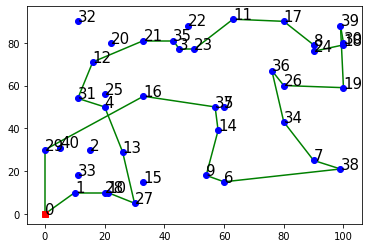

In [22]:
b_l = []
for i in range(len(Best_Solution)-1):
    k_l = []
    k_l.append(Best_Solution[i])
    k_l.append(Best_Solution[i+1])
    b_l.append(k_l)
    
for i, j in b_l :
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', zorder=0)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in range(len(loc_x)):
    plt.annotate(i,(loc_x[i],loc_y[i]),size = 15)

plt.rcParams["figure.figsize"] = (40,30)

In [23]:
def two_opt(route):
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue  # changes nothing, skip then
                new_route = route[:]  # Creates a copy of route
                new_route[i:j] = route[j - 1:i - 1:-1]  # this is the 2-optSwap since j >= i we use -1
                if cost_for_lcl(new_route) < cost_for_lcl(best):
                    best = new_route
                    improved = True
                    route = best
    return best

In [24]:
Best_Solution = two_opt(Best_Solution)

In [25]:
Best_Distance = cost_for_lcl(Best_Solution)

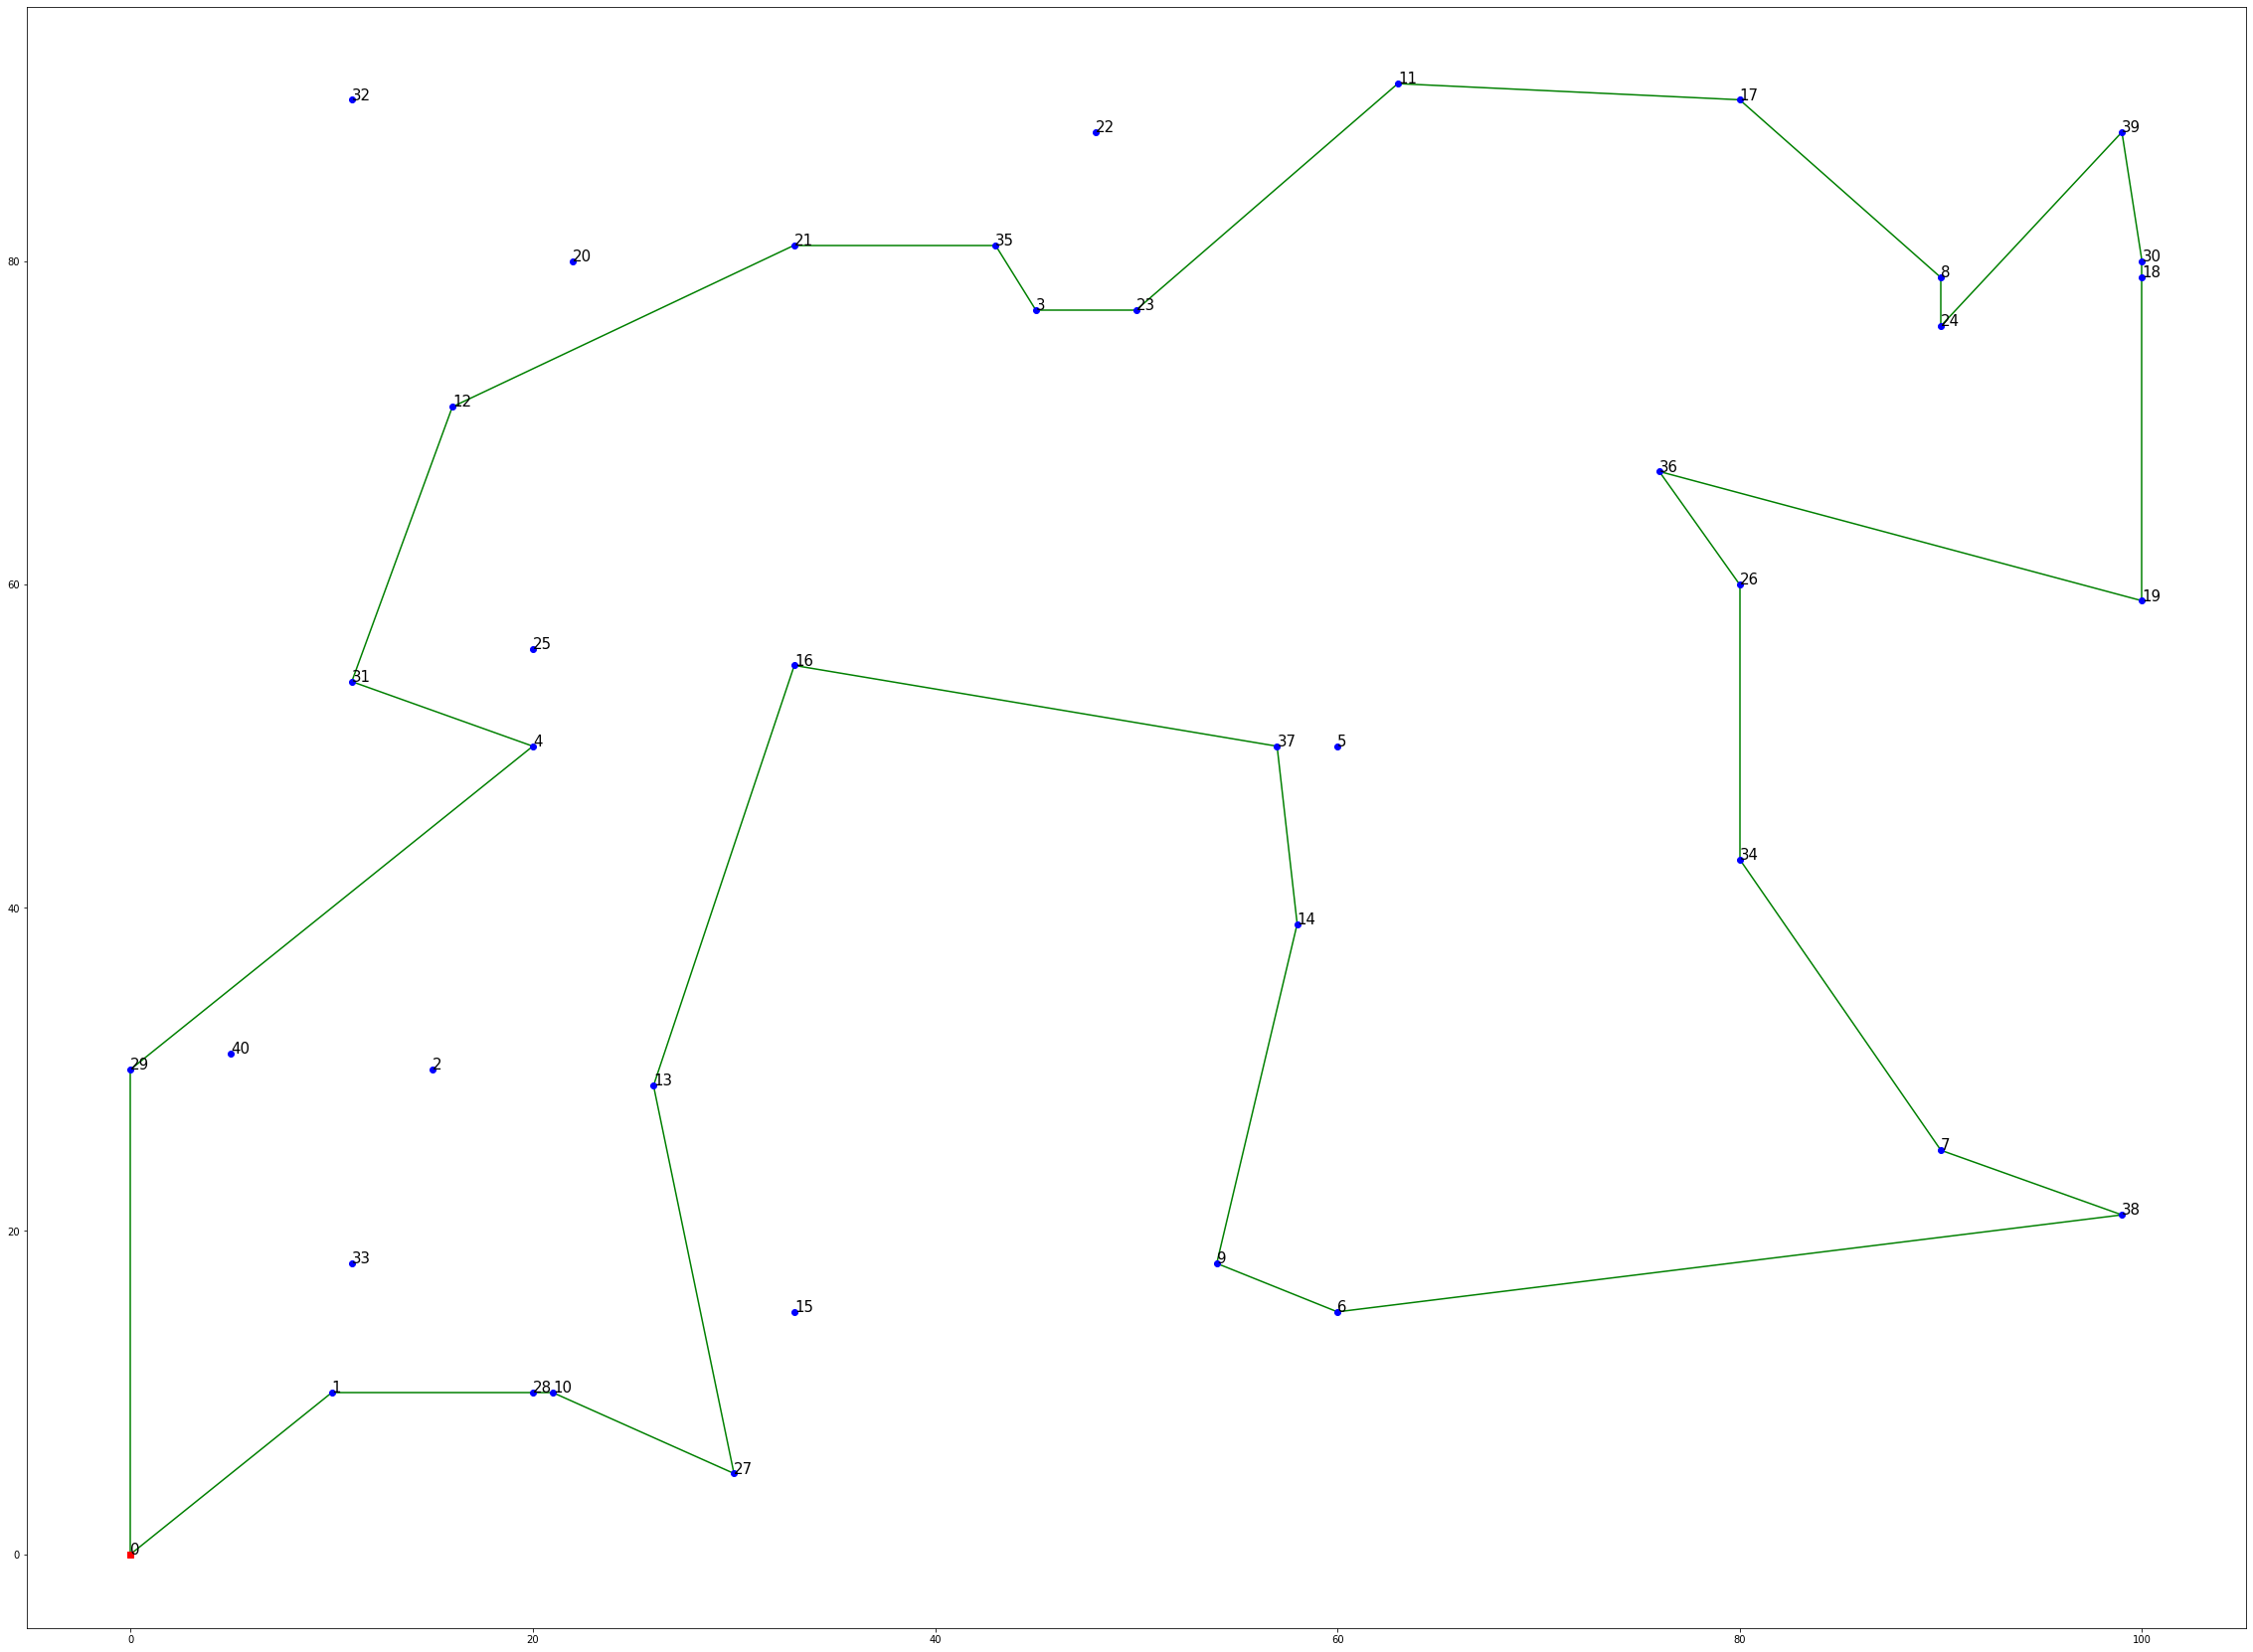

In [26]:
b_l = []
for i in range(len(Best_Solution)-1):
    k_l = []
    k_l.append(Best_Solution[i])
    k_l.append(Best_Solution[i+1])
    b_l.append(k_l)
    
for i, j in b_l :
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', zorder=0)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in range(len(loc_x)):
    plt.annotate(i,(loc_x[i],loc_y[i]),size = 15)

plt.rcParams["figure.figsize"] = (40,30)

In [27]:
print(Best_Solution,Best_Distance)

[0, 1, 28, 10, 27, 13, 16, 37, 14, 9, 6, 38, 7, 34, 26, 36, 19, 18, 30, 39, 24, 8, 17, 11, 23, 3, 35, 21, 12, 31, 4, 29, 0] 493.7115800796071
